## ARTIFICIAL NEURAL NETWORK MODEL FOR REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns = housing_data.feature_names)
df['target'] = housing_data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Split into output and input**

In [ ]:
 X = housing_data.data
 y = housing_data.target

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y , test_size= 0.2 , random_state = 42)
X_train_val, x_test_val, y_train_val, y_test_val = train_test_split(train_X, train_y, random_state=42)

In [ ]:
train_X.shape

(16512, 8)

In [ ]:
train_y.shape

(16512,)

In [ ]:
X_train_val.shape

(12384, 8)

In [ ]:
y_train_val.shape

(12384,)

**Standardize inputs**

In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)
X_train_val = scaler.transform(X_train_val)

## Model Building

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(64, activation = 'relu', input_shape = (train_X.shape[1],)),
      tf.keras.layers.Dense(32, activation = 'relu'),
      tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Call back and Best Model**

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only= True)

In [ ]:
earlystoping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights= True)

**Fit Model on Training Set**

In [ ]:
history = model.fit(X_train,train_y, epochs = 200, batch_size = 32,
                    validation_data= (X_train_val, y_train_val),
                    callbacks = [checkpoint_cb, earlystoping_cb])

**Model Performance Plot**

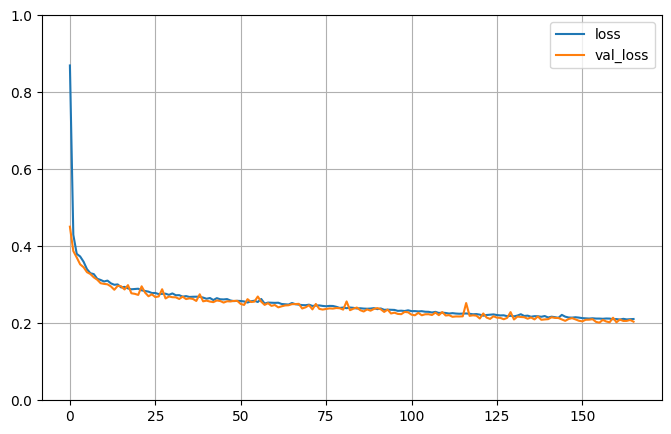

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

**Load Best Model**

In [ ]:
model = tf.keras.models.load_model('best_model.h5')

**Evaluate best model on test set**

In [ ]:
model.evaluate(X_test, test_y)

129/129 [==============================] - 1s 6ms/step - loss: 0.2589


0.25894322991371155

**Predict output**

In [ ]:
y_pred = model.predict(X_test)

129/129 [==============================] - 1s 3ms/step


**MSE on Predicted output**

In [ ]:
mean_squared_error(test_y, y_pred)

0.25894315998540746

**Saving and Restoring Model**

In [ ]:
model.save('house_price_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
%pwd

'/content'

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = tf.keras.models.load_model('house_price_model.h5')

## ARTIFICIAL NEURAL NETWORK FOR BINARY CLASSIFICATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

Predict if a patient will be diabetic or not

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/diabetes.csv')

In [ ]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [ ]:
train_X, test_X, y_train,y_test= train_test_split(X,y)
train_X_val, test_X_val, y_train_val, y_test_val = train_test_split(train_X, y_train)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)
X_train_val = scaler.transform(train_X_val)


In [ ]:
X_test_val = scaler.transform(test_X_val)

**Model Building**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics =['accuracy'])

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('diabetes_model.h5', save_best_only = True)
earlystopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights= True )

In [ ]:
model.fit(X_train,y_train, epochs = 200, batch_size = 32,
          validation_data = (X_train_val, y_train_val), callbacks = [checkpoint_cb,earlystopping_cb])

In [ ]:
validation_data = (X_train_val, y_train_val), callbacks = [checkpoint_cb,earlystopping_cb]

In [ ]:
model = tf.keras.models.load_model('diabetes_model.h5')

In [ ]:
model.evaluate(X_test_val,y_test_val)

5/5 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 1.0000


[0.0470665842294693, 1.0]

In [ ]:
y_pred = (model.predict(X_test)>0.5).astype('int')

6/6 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

0.71875

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       127
           1       0.59      0.57      0.58        65

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.68       192
weighted avg       0.72      0.72      0.72       192



In [ ]:
confusion_matrix(y_test, y_pred)

array([[101,  26],
       [ 28,  37]])

## ARTIFICIAL NEURAL NETWORK FOR MULTICLASS CLASSIFICATION

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
irish = load_iris()

In [ ]:
X = irish.data
y = irish.target
train_X, test_X, y_train,y_test = train_test_split(X,y)
scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)


**Model Building**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('irish_model.h5', save_best_only = True)
earlystopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)

In [ ]:
model.fit(X_train, y_train, epochs = 200, validation_split = 0.1, callbacks = [checkpoint_cb, earlystopping_cb])

In [ ]:
model = tf.keras.models.load_model('irish_model.h5')

In [ ]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis =1)

In [ ]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.83      1.00      0.91        10
           2       1.00      0.92      0.96        13

    accuracy                           0.95        38
   macro avg       0.94      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



## CONVOLUTIONAL NEURAL NETWORK FOR 3D IMAGES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

Standardize inputs

In [ ]:
train_images = train_images/255
test_images = test_images/255

In [ ]:
test_images.shape

(10000, 28, 28, 1)

Model Building

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3) , activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(100,(3,3), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(10, activation ='relu'),
    layers.Dense(10, activation = 'softmax')

])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'] )
model.fit(train_images, train_labels, epochs = 10, validation_split = 0.2, batch_size = 256)

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 5s 17ms/step - loss: 0.3228 - accuracy: 0.8857


[0.3228370249271393, 0.885699987411499]

ALTERNATIVE CODE

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()  # Print a summary of the model architecture


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model with callbacks
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_split=0.2,
                    batch_size=256,
                    callbacks=[early_stopping, model_checkpoint])
